In [95]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [73]:
df_mort= pd.read_table('C:/Users/DIARRA née CISSE Bal/Documents/python/mortality.txt',delimiter=';',names=['Cancer_code', 'Sex', 'Age_bucket', 'Location', 'Year', 'Nb_deaths'],low_memory=False)
df_mort.describe()

,Sex,Age_bucket,Year,Nb_deaths
count,6.359642e+06,6.359642e+06,6.359642e+06,6.359642e+06
mean,1.540061e+00,1.000000e+01,1.992326e+03,3.230369e+01
std,6.528709e-01,5.477226e+00,1.609652e+01,2.649799e+02
min,1.000000e+00,1.000000e+00,1.950000e+03,0.000000e+00
25%,1.000000e+00,5.000000e+00,1.981000e+03,0.000000e+00
50%,2.000000e+00,1.000000e+01,1.996000e+03,0.000000e+00
75%,2.000000e+00,1.500000e+01,2.006000e+03,5.000000e+00
max,9.000000e+00,1.900000e+01,2.015000e+03,3.493500e+04


In [74]:
mortality.head(5)

,Cancer_code,Sex,Age_bucket,Location,Year,Nb_deaths
0,C80,2,1,Jamaica,2000,2
1,C80,2,2,Jamaica,2000,0
2,C80,2,3,Jamaica,2000,1
3,C80,2,4,Jamaica,2000,0
4,C80,2,5,Jamaica,2000,0


In [76]:
#Attention il faut modifier a derniere ligne
df_age = pd.read_csv('C:/Users/DIARRA née CISSE Bal/Documents/python/age.csv', header = None , sep=' ')
df_age.columns=['Age_bucket', 'Age']
df_age.head()

,Age_bucket,Age
0,1,0-4
1,2,5-9
2,3,10-14
3,4,15-19
4,5,20-24


In [77]:
#read file - cancer codes
df_cancer = pd.read_csv('C:/Users/DIARRA née CISSE Bal/Documents/python/cancer_codes.csv', header=None, sep='\t')
df_cancer.columns = ['Cancer_code', 'Cancer_label']
df_cancer.head()

,Cancer_code,Cancer_label
0,C00-C14,"Malignant neoplasms of lip, oral cavity and ph..."
1,C15,Malignant neoplasm of oesophagus
2,C15-C26,Malignant neoplasm of digestive organs and per...
3,C16,Malignant neoplasm of stomach
4,C17,"Malignant neoplasm of small intestine, includi..."


In [78]:
#merge age class df + main df
df1 = pd.merge(df_mort, df_age, how='left', left_on='Age_bucket', right_on='Age_bucket')
df1.head()

,Cancer_code,Sex,Age_bucket,Location,Year,Nb_deaths,Age
0,C80,2,1,Jamaica,2000,2,0-4
1,C80,2,2,Jamaica,2000,0,5-9
2,C80,2,3,Jamaica,2000,1,10-14
3,C80,2,4,Jamaica,2000,0,15-19
4,C80,2,5,Jamaica,2000,0,20-24


In [79]:
#read csv file - WorldBank indicators
df_wb = pd.read_csv('WorldBank_Data.csv', sep=',')
#calculate absolute values per age groups and per sex
df_wb['SP.POP.TOTL.FE.ZS'].describe() #total population female, percentage
#=> percentace is 0-100, use 100-female to get male
df_wb['SP.POP.TOTL'].describe() #total population, absolute value

C:\Users\DIARRA née CISSE Bal\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


count    1.158900e+04
mean     2.274452e+08
std      7.232743e+08
min      5.632000e+03
25%               NaN
50%               NaN
75%               NaN
max      7.346706e+09
Name: SP.POP.TOTL, dtype: float64

In [80]:
df_wb['SP.POP.TOTL.FE.ZS'].head(5)

0    51.096250
1    51.145732
2    51.207205
3    51.270771
4    51.322594
Name: SP.POP.TOTL.FE.ZS, dtype: float64

In [81]:
df_wb['SP.POP.TOTL'].head(5)

0    59065.0
1    59438.0
2    59849.0
3    60239.0
4    60525.0
Name: SP.POP.TOTL, dtype: float64

In [84]:
#calculate new variables : transform percentage into absolute values for each group
#naming convention = old name without the .5Y at the end and without the SP in the beginning
pop_par_tranche_dage=['POP.0004.','POP.0509.','POP.1014.','POP.1519.','POP.2024.','POP.2529.','POP.3034.','POP.3539.','POP.4044.','POP.4549.','POP.5054.','POP.5559.','POP.6064.','POP.6569.','POP.7074.','POP.7579.','POP.80UP.']
for i in range(0,17):
    df_wb[''+pop_par_tranche_dage[i]+'FE'] =(df_wb['SP.POP.TOTL']*df_wb['SP.POP.TOTL.FE.ZS']*df_wb['SP.'+pop_par_tranche_dage[i]+'FE.5Y'])/10000
    df_wb[''+pop_par_tranche_dage[i]+'MA'] =(df_wb['SP.POP.TOTL']*(100-df_wb['SP.POP.TOTL.FE.ZS'])*df_wb['SP.'+pop_par_tranche_dage[i]+'MA.5Y'])/10000


In [85]:
#subsetting dataframe with columns to merge
df_mini = df_wb[['area','year','POP.0004.FE', 'POP.0509.FE', 'POP.1014.FE', 'POP.1519.FE', 'POP.2024.FE', 'POP.2529.FE', 'POP.3034.FE', 'POP.3539.FE', 'POP.4044.FE', 'POP.4549.FE', 'POP.5054.FE', 'POP.5559.FE', 'POP.6064.FE', 'POP.6569.FE', 'POP.7074.FE', 'POP.7579.FE', 'POP.80UP.FE', 'POP.0004.MA', 'POP.0509.MA', 'POP.1014.MA', 'POP.1519.MA', 'POP.2024.MA', 'POP.2529.MA', 'POP.3034.MA', 'POP.3539.MA', 'POP.4044.MA', 'POP.4549.MA', 'POP.5054.MA', 'POP.5559.MA', 'POP.6064.MA', 'POP.6569.MA', 'POP.7074.MA', 'POP.7579.MA', 'POP.80UP.MA']]
df_mini.head()

,area,year,POP.0004.FE,POP.0509.FE,POP.1014.FE,POP.1519.FE,POP.2024.FE,POP.2529.FE,POP.3034.FE,POP.3539.FE,...,POP.3539.MA,POP.4044.MA,POP.4549.MA,POP.5054.MA,POP.5559.MA,POP.6064.MA,POP.6569.MA,POP.7074.MA,POP.7579.MA,POP.80UP.MA
0,Aruba,1970,3434.0,3793.0,3586.0,3365.0,2879.0,2302.0,1946.0,1915.0,...,1544.0,1316.0,1175.0,1056.0,943.0,886.0,524.0,295.0,144.0,76.0
1,Aruba,1971,3218.0,3713.0,3578.0,3365.0,2975.0,2415.0,2003.0,1955.0,...,1602.0,1348.0,1172.0,1051.0,930.0,895.0,579.0,320.0,160.0,85.0
2,Aruba,1972,3109.0,3574.0,3580.0,3343.0,3043.0,2531.0,2076.0,1973.0,...,1655.0,1393.0,1174.0,1044.0,924.0,881.0,640.0,345.0,178.0,95.0
3,Aruba,1973,3075.0,3374.0,3585.0,3311.0,3078.0,2648.0,2160.0,1980.0,...,1704.0,1449.0,1188.0,1033.0,922.0,854.0,700.0,371.0,197.0,107.0
4,Aruba,1974,3045.0,3143.0,3563.0,3289.0,3082.0,2754.0,2250.0,2000.0,...,1755.0,1512.0,1214.0,1025.0,921.0,827.0,743.0,405.0,216.0,121.0


In [86]:
#list of variable names about sex= female / male
df_mini.columns[df_mini.columns.str.endswith('FE')]
df_mini.columns[df_mini.columns.str.endswith('MA')]

Index(['POP.0004.MA', 'POP.0509.MA', 'POP.1014.MA', 'POP.1519.MA',
       'POP.2024.MA', 'POP.2529.MA', 'POP.3034.MA', 'POP.3539.MA',
       'POP.4044.MA', 'POP.4549.MA', 'POP.5054.MA', 'POP.5559.MA',
       'POP.6064.MA', 'POP.6569.MA', 'POP.7074.MA', 'POP.7579.MA',
       'POP.80UP.MA'],
      dtype='object')

In [87]:
#reshaping
df_mini.set_index(['area', 'year'], inplace=True)
df_mini.columns = pd.MultiIndex.from_tuples(tuple(df_mini.columns.str.split(".")))

transf = df_mini.stack(level = [1,2]).reset_index()
transf.columns = ['Country', 'Year', 'Age_group', 'Sex', 'Population']

In [88]:
df_mini.head(5)

POP                                                          \
              0004    0509    1014    1519    2024    2529    3034    3539   
                FE      FE      FE      FE      FE      FE      FE      FE   
area  year                                                                   
Aruba 1970  3434.0  3793.0  3586.0  3365.0  2879.0  2302.0  1946.0  1915.0   
      1971  3218.0  3713.0  3578.0  3365.0  2975.0  2415.0  2003.0  1955.0   
      1972  3109.0  3574.0  3580.0  3343.0  3043.0  2531.0  2076.0  1973.0   
      1973  3075.0  3374.0  3585.0  3311.0  3078.0  2648.0  2160.0  1980.0   
      1974  3045.0  3143.0  3563.0  3289.0  3082.0  2754.0  2250.0  2000.0   

                            ...                                           \
              4044    4549  ...      3539    4044    4549    5054   5559   
                FE      FE  ...        MA      MA      MA      MA     MA   
area  year                  ...                                            
Aruba 1970  1428.0  1184.0  ...    1544.0  1316.0  1175.0  1056.0  943.0   
      1971  1497.0  1189.0  ...    1602.0  1348.0  1172.0  1051.0  930.0   
      1972  1596.0  1193.0  ...    1655.0  1393.0  1174.0  1044.0  924.0   
      1973  1711.0  1207.0  ...    1704.0  1449.0  1188.0  1033.0  922.0   
      1974  1819.0  1238.0  ...    1755.0  1512.0  1214.0  1025.0  921.0   

                                               
             6064   6569   7074   7579   80UP  
               MA     MA     MA     MA     MA  
area  year                                     
Aruba 1970  886.0  524.0  295.0  144.0   76.0  
      1971  895.0  579.0  320.0  160.0   85.0  
      1972  881.0  640.0  345.0  178.0   95.0  
      1973  854.0  700.0  371.0  197.0  107.0  
      1974  827.0  743.0  405.0  216.0  121.0  

[5 rows x 34 columns]

In [89]:
#match labels
'''
MA/FE -> 1/2
0004/0509/1014... -> 1/2/3...
!!!classes in worldbank folder cap at 80, mortality folder has more classes(17:80-84, 18:85+, 19:unknown)
'''
transf['Sex'].replace(['MA', 'FE'],[1,2], inplace=True)
transf['Age_group'].replace(['0004','0509','1014','1519','2024','2529','3034','3539','4044','4549','5054','5559','6064','6569','7074','7579'],
list(range(1, 17)), inplace=True)

In [90]:
#merge mortality data with population transformed dataframe
df = pd.merge(df_mort, 
              transf, 
              how='left', 
              left_on=['Location', 'Year', 'Age_bucket', 'Sex'], 
right_on=['Country', 'Year', 'Age_group', 'Sex'])
df.head(5)

,Cancer_code,Sex,Age_bucket,Location,Year,Nb_deaths,Country,Age_group,Population
0,C80,2,1,Jamaica,2000,2,Jamaica,1,139549.999999
1,C80,2,2,Jamaica,2000,0,Jamaica,2,139845.000000
2,C80,2,3,Jamaica,2000,1,Jamaica,3,136224.000000
3,C80,2,4,Jamaica,2000,0,Jamaica,4,125944.000000
4,C80,2,5,Jamaica,2000,0,Jamaica,5,109822.000000


In [103]:
#calculate mortality as a rate
df['Mortality_rate'] = df['Nb_deaths'] / df['Population']
df['Mortality_rate'].describe()

C:\Users\DIARRA née CISSE Bal\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


count    3.652496e+06
mean     7.897091e-05
std      3.831861e-04
min      0.000000e+00
25%               NaN
50%               NaN
75%               NaN
max      8.091666e-02
Name: Mortality_rate, dtype: float64

In [99]:
df.head(5)

,Cancer_code,Sex,Age_bucket,Location,Year,Nb_deaths,Country,Age_group,Population,Mortality_rate
0,C80,2,1,Jamaica,2000,2,Jamaica,1,139549.999999,0.000014
1,C80,2,2,Jamaica,2000,0,Jamaica,2,139845.000000,0.000000
2,C80,2,3,Jamaica,2000,1,Jamaica,3,136224.000000,0.000007
3,C80,2,4,Jamaica,2000,0,Jamaica,4,125944.000000,0.000000
4,C80,2,5,Jamaica,2000,0,Jamaica,5,109822.000000,0.000000


In [104]:
#Les taux ne sont pas du tout significatifs, on decide de multiplier par 100000
df['Mortality_rate']=df['Mortality_rate']*100000
#Fin, ne regarde pas le reste. c'est super brouillon

,Cancer_code,Sex,Age_bucket,Location,Year,Nb_deaths,Country,Age_group,Population,Mortality_rate
6359627,C32,2,5,Spain,1988,0,Spain,5,1.582236e+06,0.000000
6359628,C32,2,6,Spain,1988,0,Spain,6,1.534880e+06,0.000000
6359629,C32,2,7,Spain,1988,0,Spain,7,1.359602e+06,0.000000
6359630,C32,2,8,Spain,1988,0,Spain,8,1.212798e+06,0.000000
6359631,C32,2,9,Spain,1988,2,Spain,9,1.162625e+06,0.172025
6359632,C32,2,10,Spain,1988,0,Spain,10,1.049189e+06,0.000000
6359633,C32,2,11,Spain,1988,4,Spain,11,1.086171e+06,0.368266
6359634,C32,2,12,Spain,1988,6,Spain,12,1.173516e+06,0.511284
6359635,C32,2,13,Spain,1988,6,Spain,13,1.046095e+06,0.573562
6359636,C32,2,14,Spain,1988,5,Spain,14,8.867170e+05,0.563878


In [129]:
df[df['Location']=='Estonia']

,Cancer_code,Sex,Age_bucket,Location,Year,Nb_deaths,Country,Age_group,Population,Mortality_rate
38,C16,1,1,Estonia,2001,0,Estonia,1,31363.778577,0.000000
39,C16,1,2,Estonia,2001,0,Estonia,2,38407.313663,0.000000
40,C16,1,3,Estonia,2001,0,Estonia,3,52583.151128,0.000000
41,C16,1,4,Estonia,2001,0,Estonia,4,53141.686904,0.000000
42,C16,1,5,Estonia,2001,0,Estonia,5,50344.021099,0.000000
43,C16,1,6,Estonia,2001,0,Estonia,6,51178.832606,0.000000
44,C16,1,7,Estonia,2001,0,Estonia,7,46254.741312,0.000000
45,C16,1,8,Estonia,2001,1,Estonia,8,48761.170606,2.050812
46,C16,1,9,Estonia,2001,5,Estonia,9,49593.987343,10.081867
47,C16,1,10,Estonia,2001,5,Estonia,10,46501.095485,10.752435


supprimer les lignes ou il y a les NA
df.groupby(['Location'])['Mortality_rate'].sum()

In [139]:
df.groupby(['Location'])['Mortality_rate'].sum()

Location
Albania                              197412.944680
Anguilla                                       NaN
Antigua and Barbuda                  294551.435035
Argentina                            387261.567836
Armenia                              220792.530141
Aruba                                150422.663114
Australia                            516584.690821
Austria                              606132.914416
Azerbaijan                           128182.750055
Bahamas                                        NaN
Bahrain                              122523.811897
Barbados                             364120.913469
Belarus                              270561.652718
Belgium                              598822.696612
Belize                               200548.227464
Bermuda                                        NaN
Bolivia                                4902.440205
Bosnia and Herzegovina               119284.110024
Brazil                               372253.378086
British Virgin Islands

In [149]:
#Je commence d'abord par supprimer les pays dont je n'ai aucune information,tranche d'age de 17 à 19
df2=df.dropna(subset=['Country'])

In [151]:
df2[df2['Location']=='Estonia']
#df2.groupby(['Location'])['Mortality_rate'].sum()

,Cancer_code,Sex,Age_bucket,Location,Year,Nb_deaths,Country,Age_group,Population,Mortality_rate
38,C16,1,1,Estonia,2001,0,Estonia,1,31363.778577,0.000000
39,C16,1,2,Estonia,2001,0,Estonia,2,38407.313663,0.000000
40,C16,1,3,Estonia,2001,0,Estonia,3,52583.151128,0.000000
41,C16,1,4,Estonia,2001,0,Estonia,4,53141.686904,0.000000
42,C16,1,5,Estonia,2001,0,Estonia,5,50344.021099,0.000000
43,C16,1,6,Estonia,2001,0,Estonia,6,51178.832606,0.000000
44,C16,1,7,Estonia,2001,0,Estonia,7,46254.741312,0.000000
45,C16,1,8,Estonia,2001,1,Estonia,8,48761.170606,2.050812
46,C16,1,9,Estonia,2001,5,Estonia,9,49593.987343,10.081867
47,C16,1,10,Estonia,2001,5,Estonia,10,46501.095485,10.752435


In [113]:
#test
pd.isnull(df['Mortality_rate'][1])
#pd.isnull([1,2])

False

In [124]:
#df.groupby(['Location'])['Location']
location=df['Location'].unique()

In [132]:
df.groupby(['Location'])['Mortality_rate'].sum()

Location
Albania                              197412.944680
Anguilla                                       NaN
Antigua and Barbuda                  294551.435035
Argentina                            387261.567836
Armenia                              220792.530141
Aruba                                150422.663114
Australia                            516584.690821
Austria                              606132.914416
Azerbaijan                           128182.750055
Bahamas                                        NaN
Bahrain                              122523.811897
Barbados                             364120.913469
Belarus                              270561.652718
Belgium                              598822.696612
Belize                               200548.227464
Bermuda                                        NaN
Bolivia                                4902.440205
Bosnia and Herzegovina               119284.110024
Brazil                               372253.378086
British Virgin Islands

In [ ]:
#for i in range(0,len(location)):
#    for j in range(0,len(df[df['Location']==location[i]])):
#        pd.isnull(df[df['Location']==location[i]])

In [154]:
#for i in range(0,len(location)):
#    print(len(df[df['Location']==location[i]]['Mortality_rate']))

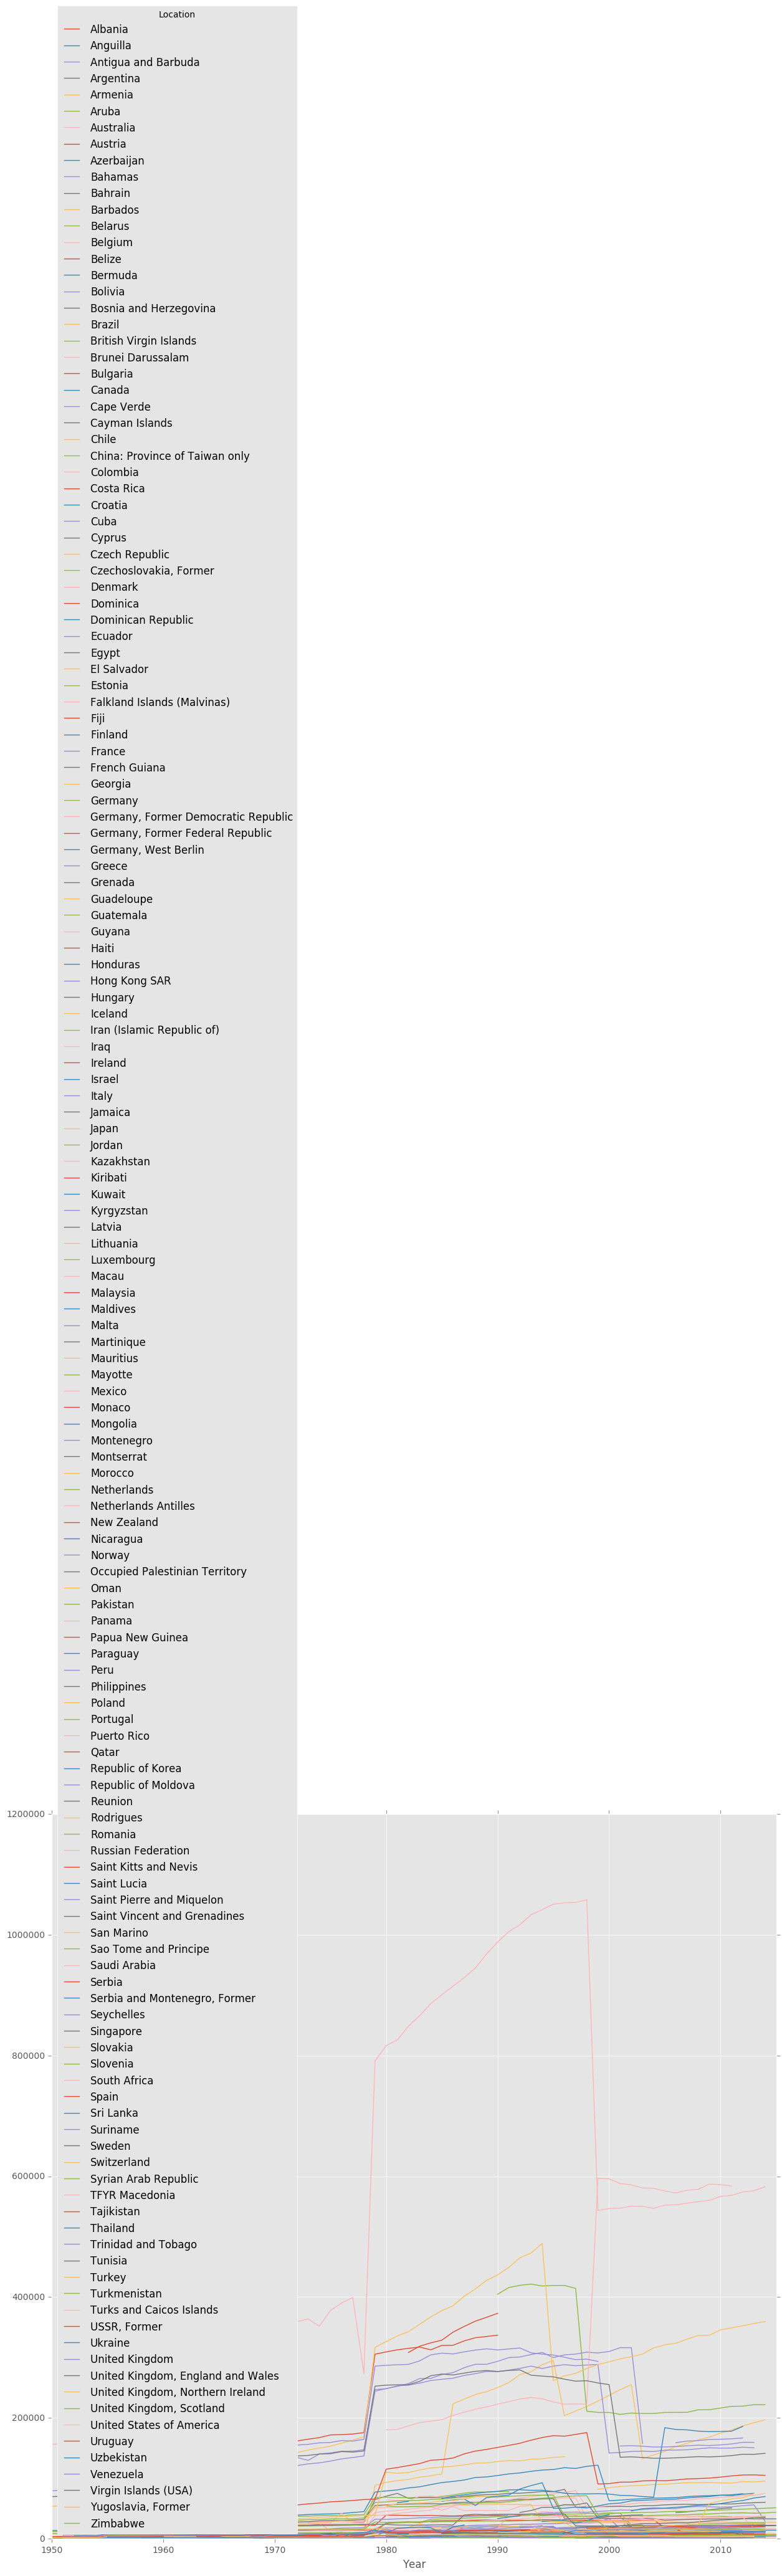

In [96]:
#plot time series
cancer='C80'
plot_data = df_mort[df_mort['Cancer_code'] == cancer]
df_mort\
    .groupby([df_mort.Year.name, df_mort.Location.name])['Nb_deaths']\
    .sum()\
    .unstack()\
.plot(figsize=(15,15))

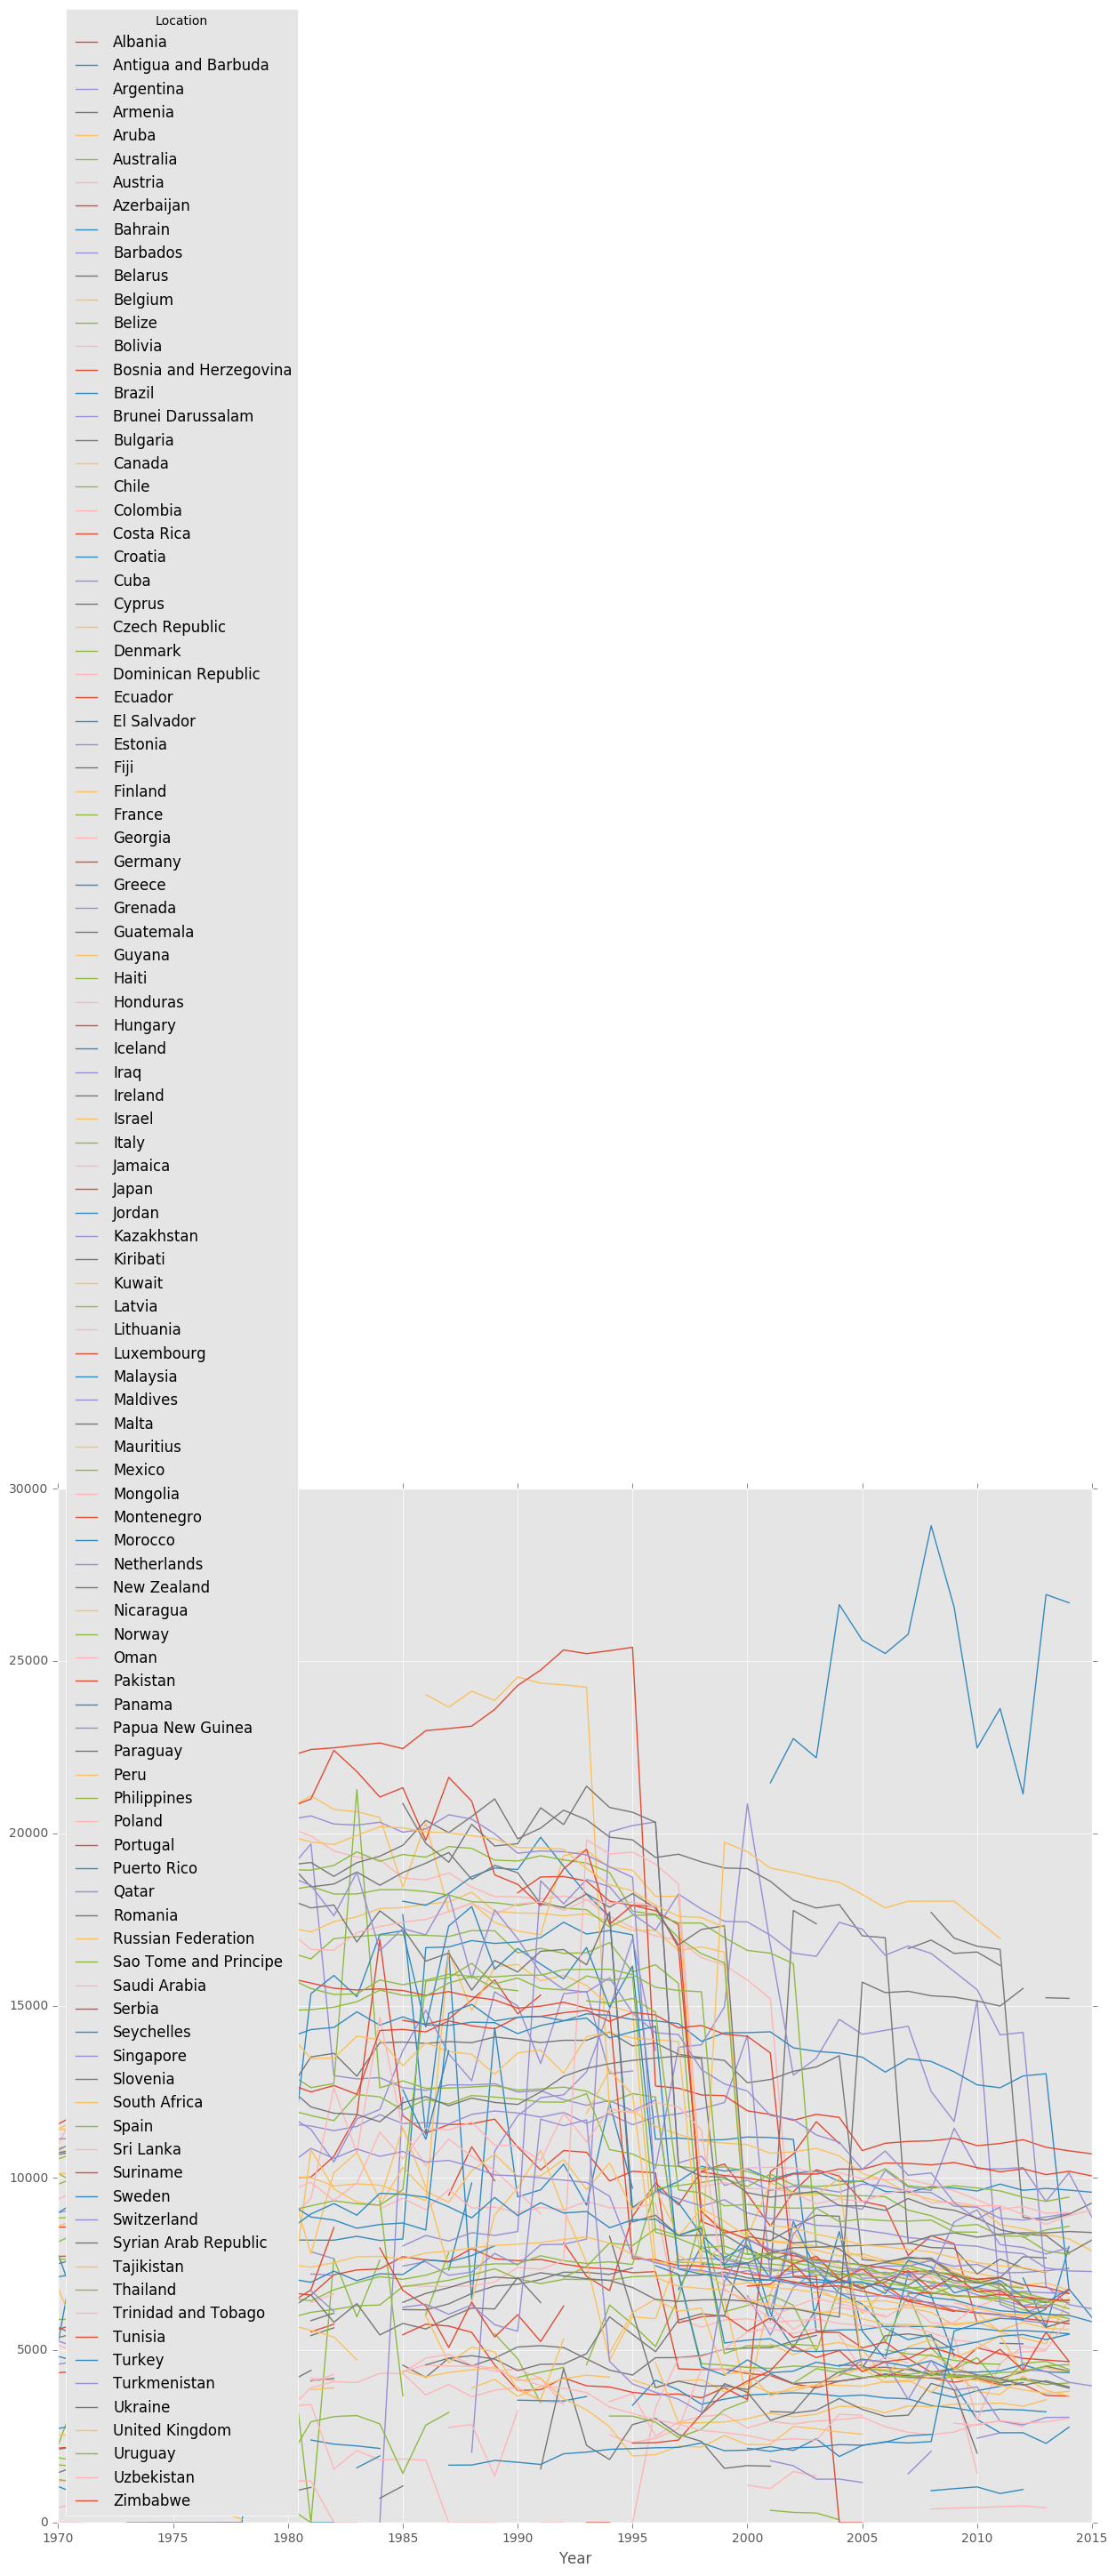

In [153]:
#plot time series
cancer='C80'
plot_data = df2[df2['Cancer_code'] == cancer]
df2\
    .groupby([df2.Year.name, df2.Location.name])['Mortality_rate']\
    .sum()\
    .unstack()\
.plot(figsize=(15,15))